In [1]:
import os
os.chdir('/Users/obadaessa/Desktop/Internship/Data Sets')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data1 = pd.read_csv('Mall_Customers.csv')

data1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA

In [2]:
data1.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
data1.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
data1.shape

(200, 5)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data1.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data1.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [8]:
x = data1.iloc[:, [3,4]].values

In [9]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

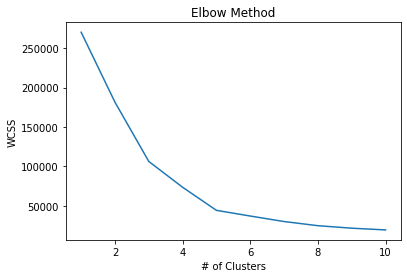

In [12]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
ykmeans = kmeansmodel.fit_predict(x)

# For UNSUPERVISED we use fit_predict()

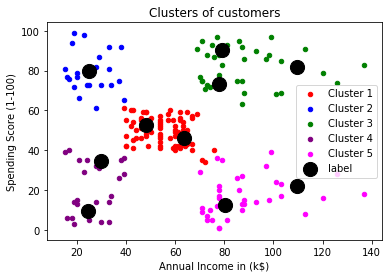

In [14]:
plt.scatter(x[ykmeans==0, 0], x[ykmeans==0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(x[ykmeans==1, 0], x[ykmeans==1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(x[ykmeans==2, 0], x[ykmeans==2, 1], s=20, c='green', label='Cluster 3')
plt.scatter(x[ykmeans==3, 0], x[ykmeans==3, 1], s=20, c='purple', label='Cluster 4')
plt.scatter(x[ykmeans==4, 0], x[ykmeans==4, 1], s=20, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='label')
plt.title('Clusters of customers')
plt.xlabel('Annual Income in (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Loan Prediction

In [15]:
import random as rd

""" 
FOR FIXING CSV

with open('/Users/obadaessa/Desktop/Internship/Data Sets/loan.csv', "r+", encoding="utf-8") as csv_file:
    content = csv_file.read()

with open('/Users/obadaessa/Desktop/Internship/Data Sets/loan.csv', "w+", encoding="utf-8") as csv_file:
    csv_file.write(content.replace(';', ','))
    
"""

data1 = pd.read_csv('loan.csv')

data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [16]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [17]:
x = data1
k = 3     # Number of clusters

In [18]:
cen =(x.sample(n=k)) # Centroids

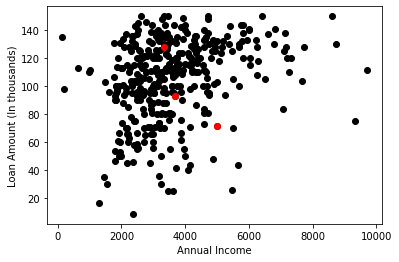

In [19]:
plt.scatter(x['ApplicantIncome'], x['LoanAmount'], c='black')
plt.scatter(cen['ApplicantIncome'], cen['LoanAmount'], c='red')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In thousands)')
plt.show()

In [20]:
diff = 1
j = 0

while(diff!=0):
    xd = x
    i = 1
    for index1, rowc in cen.iterrows():
        ed = []
        for index2, rowd in xd.iterrows():
            d1 = (rowc['ApplicantIncome']-rowd['ApplicantIncome'])**2
            d2 = (rowc['LoanAmount']-rowd['LoanAmount'])**2
            d = np.sqrt(d1+d2)
            ed.append(d)
        x[i] = ed
        i += 1
        
    c = []
    for index, row in x.iterrows():
        mindist = row[1]
        pos = 1
        for i in range(k):
            if row[i+1] < mindist:
                mindist = row[i+1]
                pos = i+1
        c.append(pos)
    x['Cluster'] = c
    cennew = x.groupby(['Cluster']).mean()[['LoanAmount', 'ApplicantIncome']]
    if j==0:
        diff=1
        j+=1
    else:
        diff = (cennew['LoanAmount']-cen['LoanAmount']).sum() + (cennew['ApplicantIncome']-cen['ApplicantIncome']).sum()
        print(diff.sum())
    cen = x.groupby(['Cluster']).mean()[['LoanAmount', 'ApplicantIncome']]

357.32997695378066
217.0042628886838
136.73146185732367
70.31966177394641
45.18558680020659
18.352983775789752
18.345487493007468
46.27013250786139
0.0


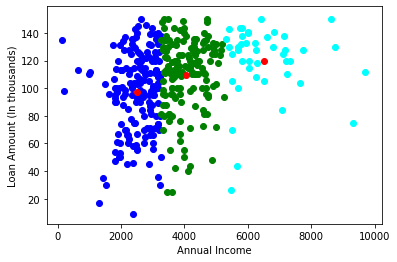

In [21]:
color = ['blue', 'green', 'cyan']

for kay in range(k):
    data1 = x[x['Cluster']==kay+1]
    plt.scatter(data1['ApplicantIncome'], data1['LoanAmount'], c=color[kay])
    
plt.scatter(cen['ApplicantIncome'], cen['LoanAmount'], c='red')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount (In thousands)')
plt.show()